# **Homework 3: Linear Regression & SVD**

## **1**



In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

data_path = "./faithful.csv"

faithful_data = pd.read_csv(data_path)

### **a**

<Axes: xlabel='eruptions', ylabel='waiting'>

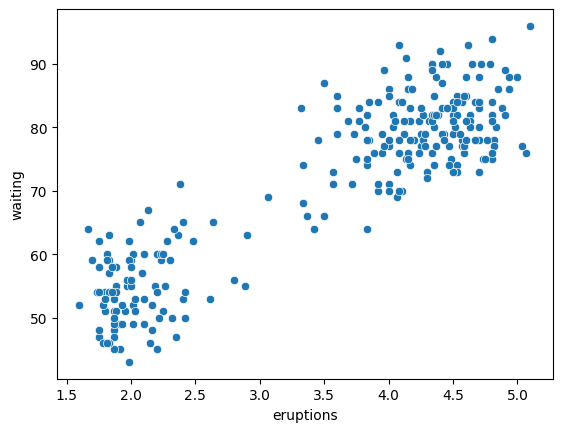

In [22]:
x_eruptions = faithful_data["eruptions"]
y_waiting = faithful_data["waiting"]

sns.scatterplot(x = x_eruptions, y = y_waiting)

There seems to be a positive linear relationship between the eruption duration and wait times.

### **b**

In [23]:
"""
Calculates the mean of a given dataset
@data : of type pandas.Series
"""
def calculate_mean(data):
  n = 0
  sum = 0

  for val in data:
    sum += val
    n += 1

  return sum/n

x_mean = calculate_mean(x_eruptions)
y_mean = calculate_mean(y_waiting)

print("Eruption Time Mean:", x_mean)
print("Waiting Time Mean:", y_mean)

Eruption Time Mean: 3.4877830882352936
Waiting Time Mean: 70.8970588235294


In [24]:
# center the data
centered_eruptions = x_eruptions - [x_mean] * x_eruptions.size
centered_waiting = y_waiting - [y_mean] * y_waiting.size

### **c**

In [25]:
# manually calculates the dot product
def calculate_dot_product(dataset1, dataset2):
  n = dataset1.size
  i = 0
  dot_product = 0

  for i in range(n):
    dot_product += (dataset1[i] * dataset2[i])

  return dot_product

# calculate the correlation
def calculate_correlation(dataset1, dataset2):
  numerator = calculate_dot_product(dataset1, dataset2)
  denominator = np.sqrt(calculate_dot_product(dataset1, dataset1)) * np.sqrt(calculate_dot_product(dataset2, dataset2))

  return numerator / denominator

correlation = calculate_correlation(x_eruptions, y_waiting)

print("Correlation:", correlation)

Correlation: 0.9862066493738285


The correlation value and sign match what I expected because the scatterplot does indicate that the variables have a strong positive relationship with each other.

### **d**

In [26]:
from numpy import linalg as la
import math

# calculates the beta
def calculate_beta(centered_x, centered_y):
  numerator = np.dot(centered_x, centered_y)
  denominator = np.dot(centered_x, centered_x.T)
  # denominator = math.pow(la.norm(centered_x), 2)

  return numerator / denominator


# calculate the alpha
def calculate_alpha(x_data, y_data, beta_hat):
  y_mean = calculate_mean(y_data)
  x_mean = calculate_mean(x_data)

  return (y_mean - beta_hat * x_mean)

beta_hat = calculate_beta(centered_eruptions, centered_waiting)

alpha_hat = calculate_alpha(x_eruptions, y_waiting, beta_hat)

print("Beta:", beta_hat, "Alpha:", alpha_hat)

Beta: 10.729641395133527 Alpha: 33.47439702275335


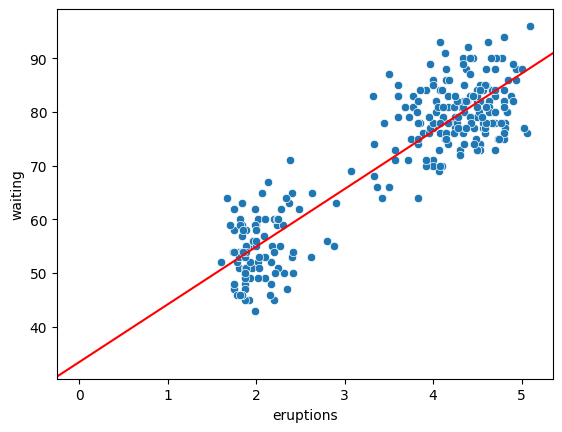

In [27]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

x_eruptions = faithful_data["eruptions"]
y_waiting = faithful_data["waiting"]

sns.scatterplot(x = x_eruptions, y = y_waiting)
plt.axline(xy1 = (0, alpha_hat), slope = beta_hat, color = 'r') # creates the line on top of the scatterplot

The value of the correlation and the slope are seem to match in that the slope seems to accurately closely match with the trend between the eruptions time and wait which reflects a higher correlation. In other words, the slope value seems to indicate a strong correlation between eruptions time and the waiting time. The sign for both the correlation and the slope are the same in the sense that the slope indicates a positive relationship between the eruption time and wait time just as the correlation indicates a positive relationship between the two variables.

### **e**

In [28]:
def calculate_y_hat(x, beta_hat, alpha_hat):
  return alpha_hat + x * beta_hat

In [29]:
print(calculate_y_hat(2.2, beta_hat, alpha_hat))

57.07960809204711


I expect to wait about 57 minutes for the next eruption.

### **f**

In [30]:
# calculates a single instance of epsilon
def get_epsilon(x_val, y_true_val, beta_hat, alpha_hat):
  return y_true_val - alpha_hat - beta_hat * x_val

epsilon_test = get_epsilon(x_eruptions[0], y_waiting[0], beta_hat, alpha_hat)
print(epsilon_test)

6.898893954765953


In [31]:
# calculates the variance
def calculate_variance(x, y, beta_hat, alpha_hat):
  n = x.shape[0]
  variance = np.ndarray(shape = (n, 1))

  for i in range(n):
    epsilon_val = get_epsilon(x[i], y[i], beta_hat, alpha_hat)
    variance[i] = epsilon_val

  return variance

variance = calculate_variance(x_eruptions, y_waiting, beta_hat, alpha_hat)
print(variance)

[[  6.89889395]
 [  1.21224847]
 [  4.76370821]
 [  4.02983167]
 [  2.88813853]
 [ -9.40795316]
 [  4.09628842]
 [ 12.89889395]
 [ -3.39719774]
 [  4.85166291]
 [  0.8581703 ]
 [  8.49759763]
 [ -0.53889088]
 [ -5.25126946]
 [ -0.90371158]
 [ -4.72552993]
 [  9.74873054]
 [ -0.97667572]
 [  1.35817675]
 [ -0.07537295]
 [ -1.78775153]
 [ -5.25126946]
 [  7.50834016]
 [  2.61779282]
 [ -8.11186147]
 [ 10.89889395]
 [  0.42039835]
 [ -1.28352284]
 [  3.21648361]
 [ -2.03889733]
 [ -6.61185502]
 [ -4.40370513]
 [ -3.6010996 ]
 [  3.25295923]
 [ -0.60111249]
 [ -3.11608372]
 [ -5.50663751]
 [ -5.33075389]
 [  5.8581703 ]
 [  5.20572818]
 [ -0.14833709]
 [  4.32168823]
 [  1.52333073]
 [  5.74873054]
 [ -9.11186147]
 [ 13.93538247]
 [-10.60111249]
 [ -3.00664395]
 [ -1.18482561]
 [  4.06632019]
 [ -9.97667572]
 [  5.92461416]
 [  0.8581703 ]
 [ -5.33075389]
 [  1.93113444]
 [ -2.86723596]
 [ -2.35647409]
 [ 12.63929077]
 [ -5.47666927]
 [  1.20574107]
 [  1.56631374]
 [  2.2422167 ]
 [ -4.25

In [32]:
# calculate the r^2
def calculate_r_squared(variance, y):
  explained = (np.dot(variance.T, variance)) / (np.dot(y, y.T))

  return (1 - explained)

r_squared = calculate_r_squared(variance, y_waiting)
print(r_squared)

[[0.9933369]]


About $99$% of variance is explained by the regression model.

## **2**

In [33]:
# load the .dat files
hand_1_path = "./hand1.dat"
hand_2_path = "./hand2.dat"

hand_1 = pd.read_csv(hand_1_path, header = None)
hand_1.columns = ["x", "y"]
hand_2 = pd.read_csv(hand_2_path, header = None)
hand_2.columns = ["x", "y"]

hand_1.head()

,x,y
0,301,509
1,314,489
2,333,473
3,350,455
4,366,436


### **a)**

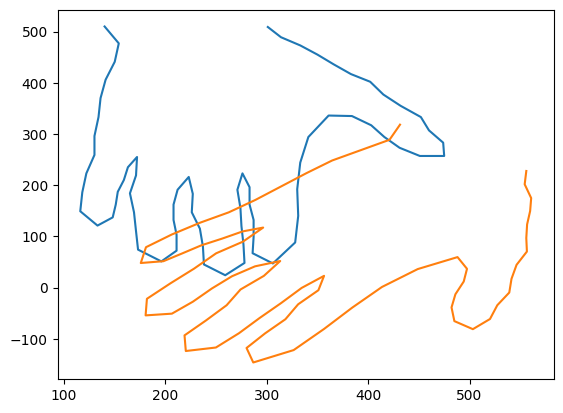

In [34]:
plt.plot(hand_1["x"], hand_1["y"])
plt.plot(hand_2["x"], hand_2["y"])

### **b)**

Create Matrix: $A_1^TA_2$

Compute the SVD: $USV^T=A_1^TA_2$

Optimal Rotation is: $R = UV^T$

In [35]:
# create the matrix
def create_matrix(A1, A2):
  return np.matmul(A1.T, A2)

matrix = create_matrix(hand_1, hand_2)
print("Shape of the matrix:", matrix.shape)
print("Matrix:", matrix)

Shape of the matrix: (2, 2)
Matrix:               0             1
x  7.314973e+06  3.455143e+05
y  6.694258e+06  1.352442e+06


<ipython-input-35-924278459dc0>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  return np.matmul(A1.T, A2)


In [36]:
# compute the SVD
U, S, Vt = la.svd(matrix)

In [37]:
# calculate rotation
R = np.matmul(U, Vt)
print("R matrix shape:", R.shape)
print("R matrix:", R)

R matrix shape: (2, 2)
R matrix: [[ 0.80673157 -0.59091807]
 [ 0.59091807  0.80673157]]


In [38]:
theta = math.acos(R[0][0]) * (180/math.pi)
print(theta)

36.222184483255774


It varies about $36$ deg.

### **c)**

In [39]:
hand_2_rotate = np.matmul(R, hand_2.T).T
print(hand_2_rotate.shape)
hand_2_rotate.head()

(72, 2)


,0,1
0,314.016047,512.221556
1,328.101254,490.276011
2,349.170898,472.357581
3,363.252227,451.412029
4,376.341320,428.462613


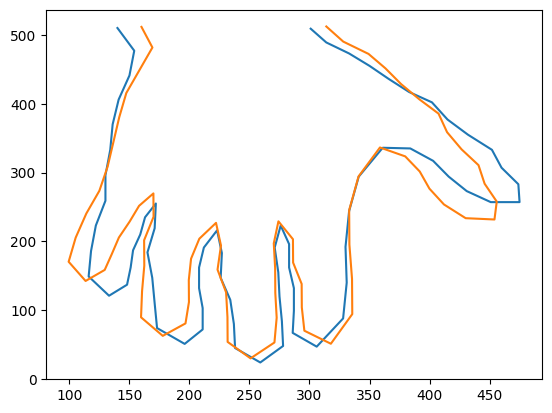

In [40]:
plt.plot(hand_1["x"], hand_1["y"])
plt.plot(hand_2_rotate[0], hand_2_rotate[1])

The two hands do align.

## **3**

### **a)**

The second equation $y_i = ax_i^2+bx_i+c+\epsilon_i$ would fit the best the data sample seems to be quadratic. Using the first equation would simply underfit the data (unless some trick was used).

### **b)**

Given model: $y_i = ax_i^2+bx_i+c+\epsilon_i$

Isolating $\epsilon_i$
$$-\epsilon_i = ax_i^2+bx_i+c- y_i$$
$$\epsilon_i = -ax_i^2-bx_i-c+y_i$$
$$\epsilon_i = y_i-ax_i^2-bx_i-c$$

$$\text{energy function} = \min SSE(a, b, c) = \min \sum_{i=1}^{n}(\epsilon_i)^2 = \min \sum_{i=1}^{n}(y_i - ax_i^2-bx_i-c)^2$$

$\text{energy} = \min \sum_{i=1}^{n}(\epsilon_i)^2 = \min \sum_{i=1}^{n}(y_i - ax_i^2-bx_i-c)^2$

Solve for $a$:

First, subtract all values by their mean.

$$\tilde{y}_i = y_i - \bar{y}$$
$$\tilde{x}_i = x_i - \bar{x}$$

Calculate $a$ using derivation:

$$0 = \frac{\partial}{\partial a}\sum(\tilde{y}_i - a\tilde{x}_i^2-b\tilde{x}_i-c)^2$$

$$0 = -2\sum(\tilde{y}_i-a\tilde{x}_i^2-b\tilde{x}_i-c)\tilde{x}_i^2$$

$$0 = -2\sum(\tilde{y}_i\tilde{x}_i^2-a\tilde{x}_i^4-b\tilde{x}_i^3-c\tilde{x}_i^2)$$

$$0 = -2\sum\tilde{y}_i\tilde{x}_i^2+2a\sum\tilde{x}_i^4+2b\sum\tilde{x}_i^3+2c\sum\tilde{x}_i^2$$

$$a = \frac{\sum\tilde{y}_i\tilde{x}_i^2-b\sum\tilde{x}_i^3-c\sum\tilde{x}_i^2}{\sum\tilde{x}_i^4}$$

$$a = \frac{\sum\tilde{y}_i-b\sum\tilde{x}_i-c}{\sum\tilde{x}_i^2}$$

$$a = \frac{-c}{\sum\tilde{x}_i^2}$$

Therefore, the optimal value of $a$ is found via equation: $a = \frac{-c}{\sum\tilde{x}_i^2}$

## **4**



## **Resources**

https://seaborn.pydata.org/

https://numpy.org/doc/stable/

https://www.statology.org/seaborn-add-line-to-scatterplot/

https://stackoverflow.com/questions/6745464/inverse-cosine-in-python




